In [3]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

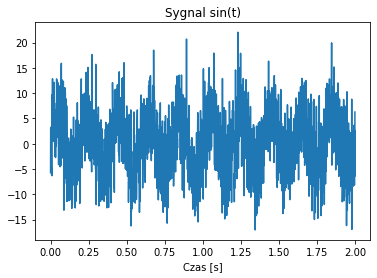

In [15]:
N=np.arange(2000)
A=5
f=5
fs=1000
dt=1/fs # okres próbkowania
t=dt*N # wektor chwil próbkowania
sin_szum=A*np.sin(2*np.pi*f*t) + A*np.random.randn(2000) # zaszumiony sygnał

fig, ax = plt.subplots()
ax.plot(t,sin_szum)
ax.set_title("Sygnal sin(t)")
ax.set_xlabel("Czas [s]")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

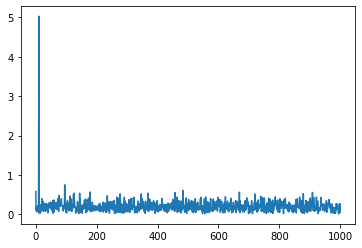

In [17]:
widmo_sin = np.abs(np.fft.rfft(sin_szum))/ 1024

fig, ax = plt.subplots()
ax.plot(widmo_sin)
plt.show

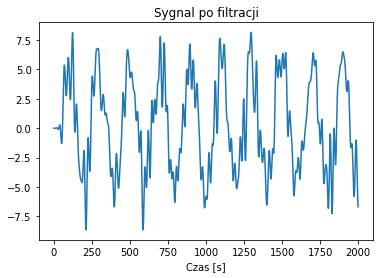

In [41]:
fd = sig.firwin(100, 0.1, window='hamming') # filtr FIR 100 próbek, pasmo 0-0.1

sin_FIR_d=sig.lfilter(fd, 1, sin_szum) # sygnał po filtracji
fig, ax = plt.subplots()
ax.plot(sin_FIR_d)
ax.set_title("Sygnal po filtracji")
ax.set_xlabel("Czas [s]")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

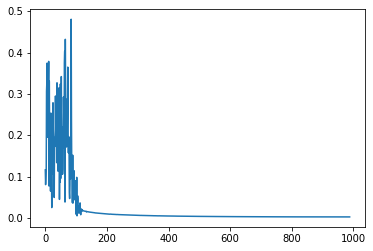

In [33]:
widmo_sin_FIR_d = np.abs(np.fft.rfft(sin_FIR_d))/ 1024

fig, ax = plt.subplots()
ax.plot(widmo_sin_FIR_d[11:1000])
plt.show

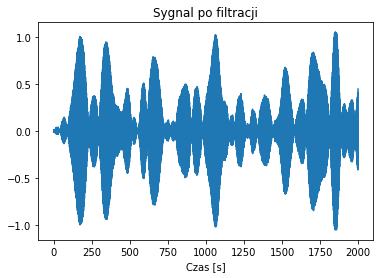

In [42]:
fg = sig.firwin(101, fs/2-1, pass_zero=False, fs=fs)
w, h_fg = sig.freqz(fg)

sin_FIR_g=sig.lfilter(fg, 1, sin_szum) # sygnał po filtracji
fig, ax = plt.subplots()
ax.plot(sin_FIR_g)
ax.set_title("Sygnal po filtracji")
ax.set_xlabel("Czas [s]")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

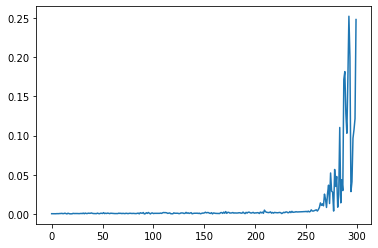

In [48]:
widmo_sin_FIR_g = np.abs(np.fft.rfft(sin_FIR_g))/ 1024

fig, ax = plt.subplots()
ax.plot(widmo_sin_FIR_g[700:1000])
plt.show

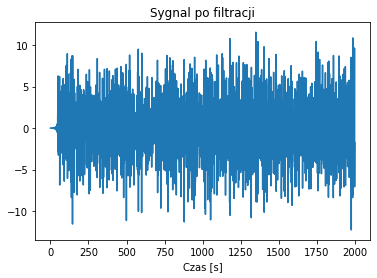

In [52]:
fp = sig.firwin(100, (200, fs/2-1), pass_zero=False, fs=fs)
w, h_fp = sig.freqz(fp)

sin_FIR_p=sig.lfilter(fp, 1, sin_szum) # sygnał po filtracji
fig, ax = plt.subplots()
ax.plot(sin_FIR_p)
ax.set_title("Sygnal po filtracji")
ax.set_xlabel("Czas [s]")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

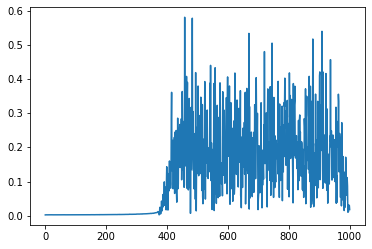

In [53]:
widmo_sin_FIR_p = np.abs(np.fft.rfft(sin_FIR_p))/ 1024

fig, ax = plt.subplots()
ax.plot(widmo_sin_FIR_p)#[700:1000])
plt.show

In [56]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)


In [59]:
sin_szum_FIR_stn = signaltonoise(sin_szum)
sin_szum_FIR_stn


array(0.04761998)

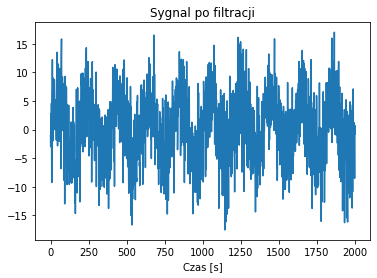

In [65]:
dp_b, dp_a = sig.iirfilter(8, 400 / (fs / 2), btype='lowpass')
sin_IIR_d = sig.lfilter(dp_b, dp_a, sin_szum)

fig, ax = plt.subplots()
ax.plot(sin_IIR_d)
ax.set_title("Sygnal po filtracji")
ax.set_xlabel("Czas [s]")
plt.show()

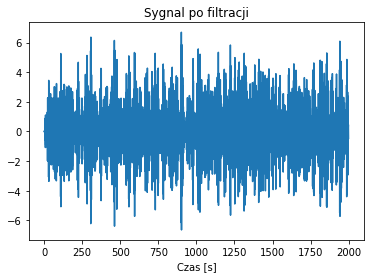

In [66]:
gp_b, gp_a = sig.iirfilter(8, 400 / (fs / 2), btype='highpass')
sin_IIR_g = sig.lfilter(gp_b, gp_a, sin_szum)

fig, ax = plt.subplots()
ax.plot(sin_IIR_g)
ax.set_title("Sygnal po filtracji")
ax.set_xlabel("Czas [s]")
plt.show()

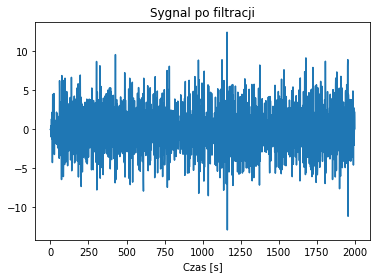

In [70]:
b_ellip_sp, a_ellip_sp = sig.iirfilter(8, (100 / (fs / 2), 300 / (fs / 2)), rp=1, rs=60, ftype='ellip', btype='bandpass')
sin_IIR_s = sig.lfilter(b_ellip_sp, a_ellip_sp, sin_szum)

fig, ax = plt.subplots()
ax.plot(sin_IIR_s)
ax.set_title("Sygnal po filtracji")
ax.set_xlabel("Czas [s]")
plt.show()

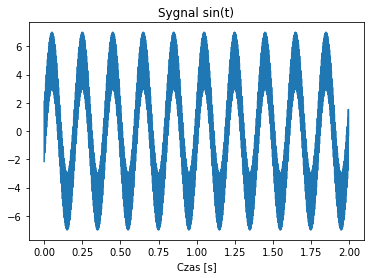

In [73]:
N=np.arange(2000)
A=5 
f1=5
f2=50
fs=1000
dt=1/fs # okres próbkowania
t=dt*(N-1) # wektor chwil próbkowania
sin_sum=A*np.sin(2*np.pi*f1*t) + 2*np.sin(10*np.pi*f2*t)# sygnał

fig, ax = plt.subplots()
ax.plot(t,sin_sum)
ax.set_title("Sygnal sin(t)")
ax.set_xlabel("Czas [s]")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

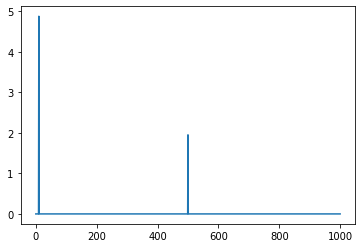

In [74]:
widmo_sin_sum = np.abs(np.fft.rfft(sin_sum))/ 1024

fig, ax = plt.subplots()
ax.plot(widmo_sin_sum)
plt.show